In [397]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [398]:
df_train = pd.read_csv('./data/firstday/churn_train.csv')
df_test = pd.read_csv('./data/firstday/churn_test.csv')

In [142]:
df_train.head()

,Customer_ID,Age,Tenure_Months,Monthly_Fee,Total_Usage_GB,Support_Tickets_3M,Late_Payments_6M,Contract,AutoPay,Internet_Type,Has_Addon,NPS_Score,Region,Churn
0,22216,38,1,70096,449,1,0,Month-to-month,1,DSL,1,-57,Seoul,0
1,22583,33,11,38262,564,2,1,Month-to-month,0,Fiber,0,69,Seoul,1
2,21663,27,34,62086,362,1,0,Month-to-month,1,Fiber,1,21,Metro,1
3,23028,56,19,72615,595,0,0,1-year,0,DSL,0,16,Seoul,0
4,24344,31,62,63279,365,2,1,2-year,0,5G,0,13,Metro,0


In [229]:
df_train.info()

<class 'pandas.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Customer_ID         6400 non-null   int64
 1   Age                 6400 non-null   int64
 2   Tenure_Months       6400 non-null   int64
 3   Monthly_Fee         6400 non-null   int64
 4   Total_Usage_GB      6400 non-null   int64
 5   Support_Tickets_3M  6400 non-null   int64
 6   Late_Payments_6M    6400 non-null   int64
 7   Contract            6400 non-null   str  
 8   AutoPay             6400 non-null   int64
 9   Internet_Type       6400 non-null   str  
 10  Has_Addon           6400 non-null   int64
 11  NPS_Score           6400 non-null   int64
 12  Region              6400 non-null   str  
 13  Churn               6400 non-null   int64
dtypes: int64(11), str(3)
memory usage: 700.1 KB


In [185]:
df_test.head()
df_test.info()

<class 'pandas.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Customer_ID         1600 non-null   int64
 1   Age                 1600 non-null   int64
 2   Tenure_Months       1600 non-null   int64
 3   Monthly_Fee         1600 non-null   int64
 4   Total_Usage_GB      1600 non-null   int64
 5   Support_Tickets_3M  1600 non-null   int64
 6   Late_Payments_6M    1600 non-null   int64
 7   Contract            1600 non-null   str  
 8   AutoPay             1600 non-null   int64
 9   Internet_Type       1600 non-null   str  
 10  Has_Addon           1600 non-null   int64
 11  NPS_Score           1600 non-null   int64
 12  Region              1600 non-null   str  
 13  Churn               1600 non-null   int64
dtypes: int64(11), str(3)
memory usage: 175.1 KB


In [231]:
df_train.isna().sum()

Customer_ID           0
Age                   0
Tenure_Months         0
Monthly_Fee           0
Total_Usage_GB        0
Support_Tickets_3M    0
Late_Payments_6M      0
Contract              0
AutoPay               0
Internet_Type         0
Has_Addon             0
NPS_Score             0
Region                0
Churn                 0
dtype: int64

In [ ]:
#Churn : 1=이탈, 0=유지
# 특징(입력 변수)
# Age : 나이
# Tenure_Months : 가입기간(개월)
# Monthly_Fee : 월 요금
# Total_Usage_GB : 최근 사용량(GB)
# Support_Tickets_3M : 최근 3개월 CS 문의 건수
# Late_Payments_6M : 최근 6개월 연체 횟수
# Contract : 계약 형태(Month-to-month / 1-year / 2-year)
# AutoPay : 자동결제(0/1)
# Internet_Type : 회선(Fiber/DSL/5G)
# Has_Addon : 부가서비스(0/1)
# NPS_Score : 만족도 점수(-100~100)
# Region : 지역(Seoul/Metro/Other)

In [399]:
df_train_data = df_train.drop("Customer_ID",axis=1)
df_test_data = df_test.drop("Customer_ID",axis=1)

<Axes: xlabel='Tenure_Months', ylabel='Count'>

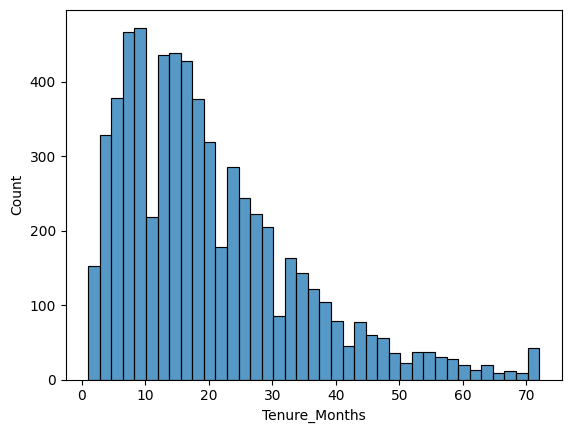

In [267]:
import matplotlib.pyplot as plt
import seaborn as sns

#sns.histplot(df_train_data["Age"])
sns.histplot(df_train_data["Tenure_Months"])

<Axes: xlabel='Monthly_Fee', ylabel='Count'>

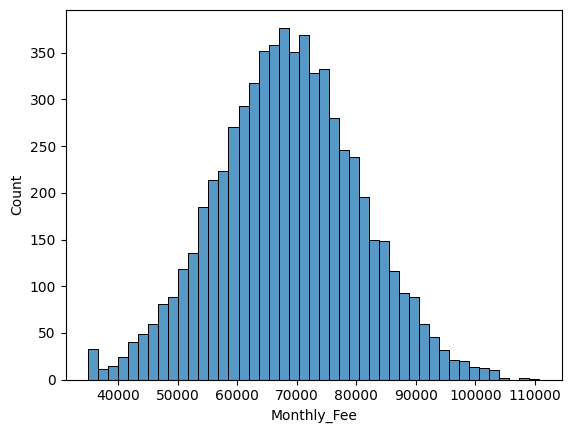

In [106]:
sns.histplot(df_train_data["Monthly_Fee"])

<Axes: xlabel='Total_Usage_GB', ylabel='Count'>

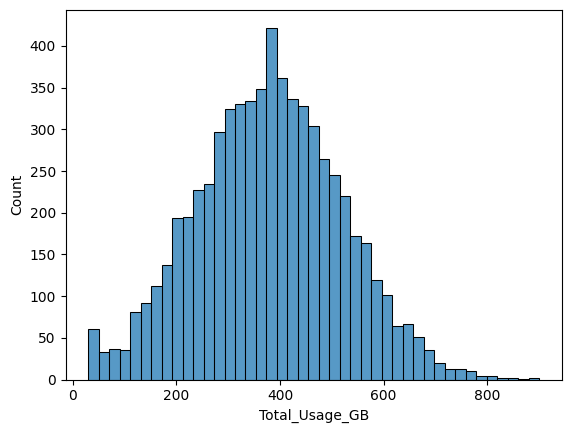

In [107]:
sns.histplot(df_train_data["Total_Usage_GB"])

<Axes: xlabel='Support_Tickets_3M', ylabel='Count'>

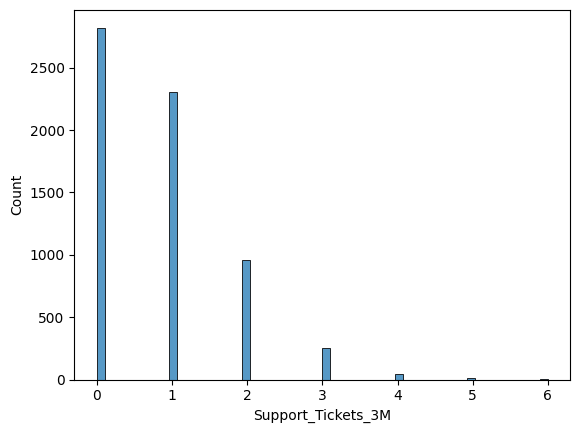

In [8]:
#Support_Tickets_3M
sns.histplot(df_train_data["Support_Tickets_3M"])

<Axes: xlabel='Contract', ylabel='Count'>

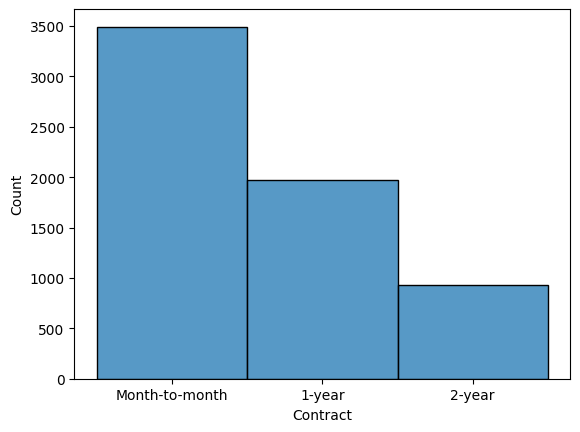

In [9]:
#Contract
sns.histplot(df_train_data["Contract"])

<Axes: xlabel='Internet_Type', ylabel='Count'>

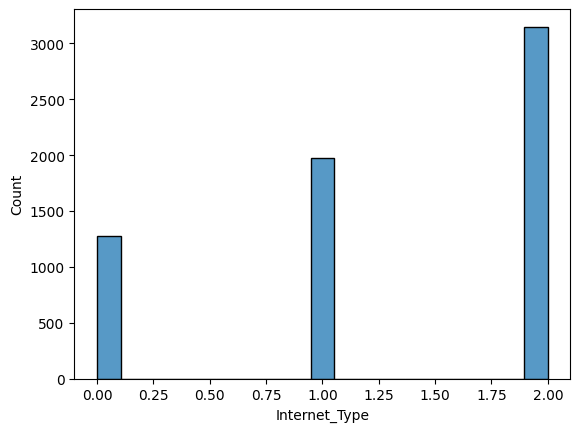

In [350]:

sns.histplot(df_train_data["Internet_Type"])

<Axes: xlabel='Late_Payments_6M', ylabel='Count'>

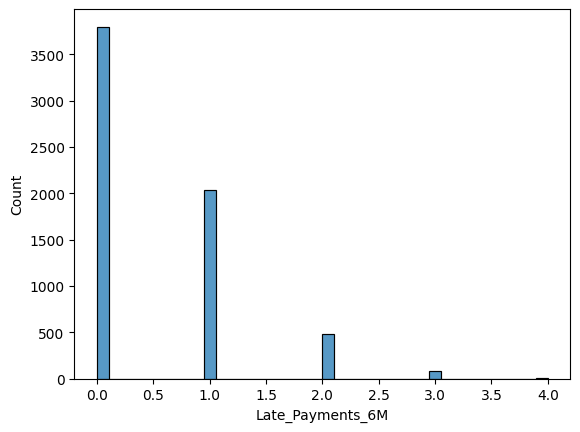

In [158]:
#Late_Payments_6M
sns.histplot(df_train_data["Late_Payments_6M"])

In [ ]:
# Churn : 1=이탈, 0=유지
# 특징(입력 변수)
# Age : 나이 - 배제
# Tenure_Months : 가입기간(개월)
# Monthly_Fee : 월 요금 - 배제
# Total_Usage_GB : 최근 사용량(GB)
# Support_Tickets_3M : 최근 3개월 CS 문의 건수
# Late_Payments_6M : 최근 6개월 연체 횟수
# Contract : 계약 형태(Month-to-month / 1-year / 2-year)
# AutoPay : 자동결제(0/1) 
# Internet_Type : 회선(Fiber/DSL/5G)
# Has_Addon : 부가서비스(0/1) - 배제
# NPS_Score : 만족도 점수(-100~100)
# Region : 지역(Seoul/Metro/Other) -배제

<Axes: xlabel='Tenure_Months', ylabel='Churn'>

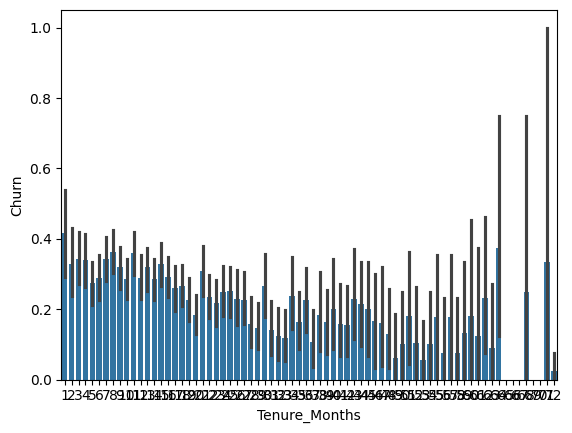

In [268]:
# Tenure_Months
sns.barplot(data=df_train_data,x="Tenure_Months",y="Churn")

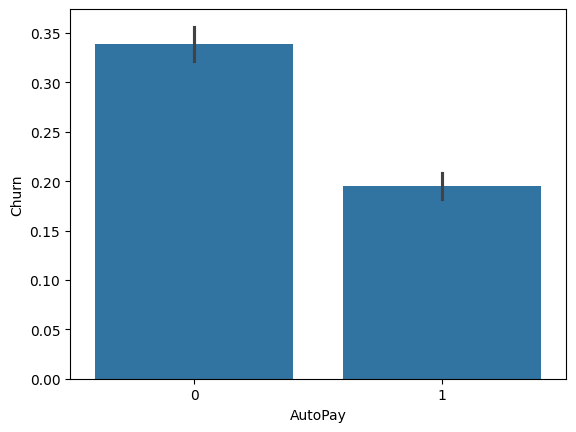

In [352]:
sns.barplot(data=df_train_data, x="AutoPay", y="Churn")

plt.show()

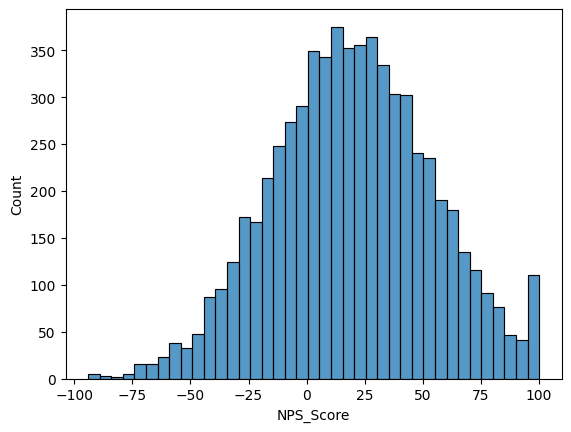

In [62]:
sns.histplot(df_train_data["NPS_Score"])
plt.show()

<Axes: xlabel='Monthly_Fee', ylabel='Region'>

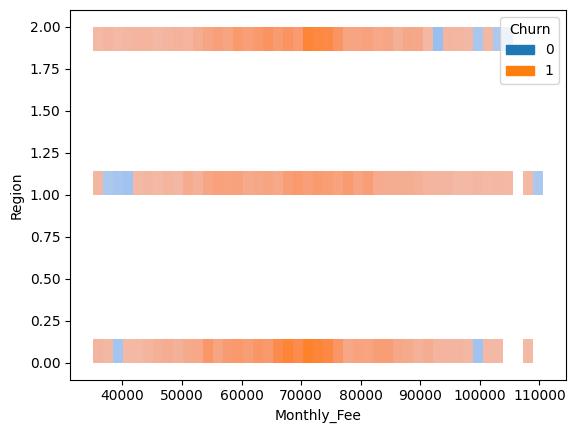

In [564]:
sns.histplot(data=df_train_data,x="Monthly_Fee",y="Region",hue="Churn")

In [400]:
encoder = LabelEncoder()
scaler = StandardScaler()
encoder_list=[{"Contract":[],"Internet_Type":[],"Region":[]}]

In [405]:
df_train_data["Contract"] = encoder.fit_transform(df_train_data["Contract"])
df_test_data["Contract"] = encoder.transform(df_test_data["Contract"])
encoder_list[0]["Contract"].append(list(encoder.classes_))

df_train_data["Internet_Type"] = encoder.fit_transform(df_train_data["Internet_Type"])
df_test_data["Internet_Type"] = encoder.transform(df_test_data["Internet_Type"])
encoder_list[0]["Internet_Type"].append(list(encoder.classes_))

df_train_data["Region"] = encoder.fit_transform(df_train_data["Region"])
df_test_data["Region"] = encoder.transform(df_test_data["Region"])
encoder_list[0]["Region"].append(list(encoder.classes_))

In [602]:
X_train_data = df_train_data.drop(columns=["Churn","Age","Region","Has_Addon","Support_Tickets_3M","NPS_Score","Total_Usage_GB"])
y_train_data = df_train_data["Churn"]

X_test_data = df_test_data.drop(columns=["Churn","Age","Region","Has_Addon","Support_Tickets_3M","NPS_Score","Total_Usage_GB"])
y_test_data = df_test_data["Churn"]

In [603]:
X_train_scaled = scaler.fit_transform(X_train_data)
X_test_scaled = scaler.transform(X_test_data)

In [604]:
# 학습
model = DecisionTreeClassifier(random_state=3333)
model.fit(X_train_scaled,y_train_data)
# 테스트
pred = model.predict(X_test_scaled)
accuracy_score(y_test_data,pred)

0.695625

In [575]:
# 학습
model = DecisionTreeClassifier(random_state=3333)
model.fit(X_train_data,y_train_data)
# 테스트
pred = model.predict(X_test_data)
accuracy_score(y_test_data,pred)

0.6925

In [605]:
# 평가지표 
from sklearn.metrics import precision_score,recall_score,f1_score
prec = precision_score(y_test_data,pred)
rec = recall_score(y_test_data,pred)
f1 = f1_score(y_test_data,pred)

print("Precision Score : ",prec) # 정밀도
print("Recall Score : ",rec) # 재현율
print("F1 Score : ",f1) # F1

Precision Score :  0.3627450980392157
Recall Score :  0.39466666666666667
F1 Score :  0.3780332056194125


In [606]:
model_rf = RandomForestClassifier(random_state=3333,n_estimators=1000,n_jobs=-1)

model_rf.fit(X_train_scaled,y_train_data)
pred_rf = model_rf.predict(X_test_scaled)

accuracy_score(y_test_data,pred_rf)

0.735

In [607]:
from sklearn.metrics import classification_report

cf_report = classification_report(y_test_data,pred,target_names=['유지','이탈'])

print(cf_report)

              precision    recall  f1-score   support

          유지       0.81      0.79      0.80      1225
          이탈       0.36      0.39      0.38       375

    accuracy                           0.70      1600
   macro avg       0.59      0.59      0.59      1600
weighted avg       0.70      0.70      0.70      1600

